# Data Wrangling Project Script

This script will cover all data wrangling steps - generating summary statistics, looking for missing data and outliers, and cleaning/transforming data when needed. 

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
#allow all columns to be viewed:
pd.set_option('display.max_columns', None)

## AirBnB Dataset Analysis

### Read in Listings

The AirBnB data comes in multiple files. The I plan to use for this project is listings.csv, which contains detailed information on all of the rentals listed in a city. The data comes from InsideAirBnB (http://insideairbnb.com/about.html#disclaimers) and can be downloaded for specific cities. I have decided to use the city of Toronto, so this version of listings.csv only contains data for Toronto. 

In [3]:
#Read in AirBnB listing data for Toronto
path='../Capstone/Data/AirBnB/listings.csv'
abb_list = pd.read_csv(path)

In [4]:
#View shape of abb_list
abb_list.shape

(17542, 96)

The listings dataset has 17,542 records and 96 columns. 

In [5]:
#View first 5 rows of dataset
abb_list.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20180808031137,2018-08-08,Beautiful home in amazing area!,"This large, family home is located in one of T...",Visit Toronto with this fabulous furnished hom...,"This large, family home is located in one of T...",none,The apartment is located in the Ossington stri...,"To learn a little more about our home, see: (U...",All forms of public transportation are easily ...,The whole house and garden are available.,"We will be out of town, but fully accessible b...",This is our much-loved family home. We expect ...,NaN,NaN,https://a0.muscache.com/im/pictures/76206750/d...,NaN,1565,https://www.airbnb.com/users/show/1565,Alexandra,2008-08-08,"Toronto, Ontario, Canada","I live in Toronto, Canada with my husband and ...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/1565/profile_...,https://a0.muscache.com/im/users/1565/profile_...,Commercial Drive,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Toronto, ON, Canada",Little Portugal,Little Portugal,NaN,Toronto,ON,M6J,Toronto,"Toronto, Canada",CA,Canada,43.646168,-79.424510,f,House,Entire home/apt,10,3.0,5.0,7.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",1400.0,$470.00,"$2,000.00",NaN,"$1,000.00",$150.00,1,$0.00,4,730,6 months ago,t,0,0,0,0,2018-08-08,7,2015-07-19,2017-12-04,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.19
1,8077,https://www.airbnb.com/rooms/8077,20180808031137,2018-08-08,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,My husband and I are both artists. I give pain...,Guest room in a luxury condo with access to al...,none,NaN,NaN,NaN,NaN,NaN,No smoking please.,NaN,NaN,https://a0.muscache.com/im/pictures/11780344/1...,NaN,22795,https://www.airbnb.com/users/show/22795,Kathie & Larry,2009-06-22,"Toronto, Ontario, Canada",My husband and I have been airbnb host for alm...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/9a077853-c...,https://a0.muscache.com/im/pictures/9a077853-c...,Harbourfront,2.0,2.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Toronto, ON, Canada",Harbourfront,Waterfront Communities-The Island,NaN,Toronto,ON,M5J,Toronto,"Toronto, Canada",CA,Canada,43.641051,-79.376277,t,Apartment,Private room,2,1.5,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$98.00,NaN,"$2,602.00","$2,602.00",NaN,1,$0.00,180,365,15 months ago,t,30,60,90,365,2018-08-08,170,2009-08-20,2013-08-27,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,t,2,1.56
2,103

At first glance I see multiple columns I can drop, and others I would like to analyze further.

 - Columns consisting of URLs - listing_URL, thumbnail_url, medium_url, picture_url, host_url, and approximately three more. I do not plan to analyze any of the pictures at these links and the data I need is already in the dataset so I will drop these columns. Note: I will keep listing_URL in the dataset for now in case I want to inspect a listing directly online. It will not be used for prediction. 
 - Free text and descriptive columns - name, summary, space, description, neighborhood_overview, etc. I have not yet decided if I want to do text analysis on these fields yet. For now I will pull these into a separate dataframe so I can more fully focus on the other fields in the listings dataset. 
 - Scraping information - scrape_id, last_scraped, calendar_last_scraped - I plan to drop scrape_id entirely. For the two "last scraped" fields, at first glance they appear to all have the same value ("2018-08-08") but I will check the unique values to confirm. If they do, I will drop them as well.
 - Redundant location fields:
     -  street: InsideAirBnB masks the exact location, so they fill the street column with "Toronto, ON, Canada". This is not useful and will be dropped.
     -  city, state, zipcode, country_code, country - These are redundant as I am focusing completely on Toronto, and will be dropped.
     -  neighbourhood, neighbourhood_cleansed, neighbourhood_group_cleansed - I probably do not need all three of these columns but I will keep them all for now. I will need to do some research and find out what the difference is between them, and which would be most useful for matching with the Yelp dataset. 
 - Reviews - the goal is to help new hosts determine how much they should charge for their listing. A new host will not have any reviews yet by definition, so we do not need these fields. They will be removed. 

### Drop unnecessary columns

The free text columns will be saved in case I decide to do further analysis on them.

In [6]:
#Move text fields into separate dataframe for now
#Create two lists of variables (text_cols_drop does not include ID so it is kept in the new dataframe)
text_cols_drop = ['name', 'summary', 'space', 'description', 'neighborhood_overview', 
                  'transit', 'access', 'house_rules', 'notes', 'interaction', 'host_about']
text_cols_transfer = text_cols_drop[:]
text_cols_transfer.append('id')
abb_text = abb_list[text_cols_transfer]
abb_text.head()

,name,summary,space,description,neighborhood_overview,transit,access,house_rules,notes,interaction,host_about,id
0,Beautiful home in amazing area!,"This large, family home is located in one of T...",Visit Toronto with this fabulous furnished hom...,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,All forms of public transportation are easily ...,The whole house and garden are available.,This is our much-loved family home. We expect ...,"To learn a little more about our home, see: (U...","We will be out of town, but fully accessible b...","I live in Toronto, Canada with my husband and ...",1419
1,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,My husband and I are both artists. I give pain...,Guest room in a luxury condo with access to al...,NaN,NaN,NaN,No smoking please.,NaN,NaN,My husband and I have been airbnb host for alm...,8077
2,Union Inn II (Leslieville),We offer a private room for two with a queen b...,"The 'union inn' offers a clean, spacious room ...",We offer a private room for two with a queen b...,Our charming adopted home of Leslieville is a ...,Our home is steps from street car and bus acce...,We have high speed wireless internet for your ...,When we travel on airbnb we behave as we would...,"Clean towels, a hair dryer, soap and sanitary ...",We love meeting new people. However we do work...,We are a couple of architects who try to make ...,10314
3,Seaton Village Parlour Bedroom,Comfortable sofa bed in airy main floor parlour.,Family of 4 (2 kids) plus a friendly dog open...,Comfortable sofa bed in airy main floor parlou...,NaN,NaN,NaN,no smoking,NaN,NaN,"I love travelling and exploring new places, ma...",12604
4,Private Room in Downtown Toronto,"First of all, I'd like to say a BIG Thank You ...",Welcome! Charming walk-up apartment in Downto...,"First of all, I'd like to say a BIG Thank You ...",The building is central to so many great neigh...,A main streetcar stops right outside the build...,I am offering the living room/guest room as a ...,"Please: -No smoking indoors, the front or back...",Find a free NOW Magazine at one of the many di...,NaN,"Born and raised in Toronto- I'm a real ""city g...",17936


In [7]:
#Now drop the transferred columns, except ID, from abb_list
abb_list.drop(columns=text_cols_drop, axis=1, inplace=True)
abb_list.shape #confirm columns have been dropped

(17542, 85)

In [8]:
#Drop review columns
review_cols_drop = ['last_review', 'review_scores_rating',
                   'review_scores_accuracy', 'review_scores_cleanliness', 
                   'review_scores_checkin', 'review_scores_communication',
                   'review_scores_location', 'review_scores_value', 'number_of_reviews']
abb_list.drop(columns=review_cols_drop, axis=1, inplace=True)
abb_list.shape

(17542, 76)

### Check for single-value columns

Checking columns that appear to have only one value. If that is true, they can be dropped.

In [9]:
print(abb_list['last_scraped'].value_counts(dropna=False))
print(abb_list['calendar_last_scraped'].value_counts(dropna=False))
print(abb_list['jurisdiction_names'].value_counts(dropna=False))
print(abb_list['host_acceptance_rate'].value_counts(dropna=False))
print(abb_list['requires_license'].value_counts(dropna=False))
print(abb_list['license'].value_counts(dropna=False))
print(abb_list['is_business_travel_ready'].value_counts(dropna=False))

2018-08-08    17542
Name: last_scraped, dtype: int64
2018-08-08    17542
Name: calendar_last_scraped, dtype: int64
NaN    17542
Name: jurisdiction_names, dtype: int64
NaN    17542
Name: host_acceptance_rate, dtype: int64
f    17542
Name: requires_license, dtype: int64
NaN    17542
Name: license, dtype: int64
f    17542
Name: is_business_travel_ready, dtype: int64


In [10]:
#Drop URL- and location-related columns, and any that seem to have only one value or not useful
url_cols = ['thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 
            'host_url', 'host_thumbnail_url', 'host_picture_url']
location_cols = ['street', 'city', 'state', 'zipcode', 'market', 'smart_location', 
                 'country_code', 'country', 'host_location']
other_cols = ['host_id', 'scrape_id', 'last_scraped', 'calendar_last_scraped', 'jurisdiction_names', 
              'host_acceptance_rate', 'requires_license', 'license', 'is_business_travel_ready',
             'first_review', 'host_location', 'host_since', 'host_name', 'host_identity_verified',
             'host_has_profile_pic', 'host_total_listings_count', 'host_listings_count', 'calculated_host_listings_count']
drop_cols = url_cols + location_cols + other_cols
abb_list.drop(columns=drop_cols, axis=1, inplace=True)
abb_list.shape 

(17542, 43)

## Handling Null Values - Checking for Nulls

Next I will check the remaining fields for null values and decide what to do with them.

In [11]:
null_rates = (1 - abb_list.count()/len(abb_list.index)) * 100
print(null_rates[null_rates > 0].sort_values(ascending=False))
print("")
print("Columns with at least one null value: " + str(null_rates[null_rates > 0].count()))

neighbourhood_group_cleansed    100.000000
square_feet                      98.990993
monthly_price                    88.068635
weekly_price                     86.261544
security_deposit                 26.735834
host_response_rate               21.593889
host_response_time               21.593889
cleaning_fee                     18.623874
reviews_per_month                18.395850
host_neighbourhood               13.316612
neighbourhood                     5.016532
beds                              0.085509
bathrooms                         0.085509
bedrooms                          0.028503
host_is_superhost                 0.011401
dtype: float64

Columns with at least one null value: 15


This provides the list of columns with at least one null value. 
 - Many of those have fewer than 1% null values. These will be handled in various ways. Some will be replaced with "Unknown". Others will be replaced with the most common value or the mean of that variable. 
 - neighbourhood_group_cleansed is 100% null, so I will drop that column entirely. 
 - square_feet, monthly_price, and weekly_price are more than 85% null. I plan to drop these columns, but first I will create a flag variable that indicates TRUE if those values existed, FALSE if they were null, because their presence might have some predictive value. 
 - That leaves variables with between 5% and 27% null values. 
     -  security_deposit, cleaning fee - I will assume if these are missing the host does not charge, and will set the values to $0.00
     -  host_response_rate, host_response_time - according to AirBnB's own information (https://www.airbnb.com/help/article/430/what-is-response-rate-and-how-is-it-calculated), these fields calculate how often a host responds to new messages or booking requests within 24 hours, within the last 30 days (or 90 if no messages received within 30 days). AirBnB does not clarify what it means if this value is missing. I will assume the host has not received a message within 90 days and replace the host_response_rate with 0%, and host_response_time with whatever the most common value is. 
     -  reviews_per_month - I am not planning to predict anything with this variable, but it can be used to estimate how often a listing is booked. If the value is missing I will replace with 0, which assumes they do not have any reviews.
     - Others will be replaced with the mode, or most common value. 

### Handling Null Values - Variables with > 85% missing values

In [12]:
#Drop neighbourhood_group_cleansed as it is 100% missing
abb_list.drop(columns='neighbourhood_group_cleansed', axis=1, inplace=True)

In [13]:
#This function will handle dropping and imputing null values
def handle_missing_values(df, col, how=['drop', 'impute'], imp_num_method='mean', imp_with='NA'):
    ###
    # df = dataframe
    # col = columns to handle
    # imp_num_method = the method to impute numeric variables with. Default is mean. 
    # imp_text_with = specified value to replace nulls with. If not specified, will
    # ... use the most common value for that variable.
    ###
    
    for iter in col:
        #Create flag variables
        df[df[iter].name + '_notNA'] = pd.notna(df[iter])

        if how == 'drop':
        #if how == 'drop', simply drop the column
            df.drop(columns=iter, axis=1, inplace=True)
        elif how == 'impute':
            if df[iter].dtype == float or df[iter].dtype == int:
            #if numeric, use the specified method (mean is default)
                if imp_num_method == 'mean':
                    df[iter].fillna(df[iter].mean()[0], inplace=True)
                elif imp_num_method == 'median':
                    df[iter].fillna(df[iter].median()[0], inplace=True)
                elif imp_num_method == 'mode':
                    df[iter].fillna(df[iter].mode()[0], inplace=True)
                elif imp_num_method == 'max':
                    df[iter].fillna(df[iter].max[0], inplace=True)
                elif imp_num_method == 'min':
                    df[iter].fillna(df[iter].min[0], inplace=True)
                elif imp_num_method == 'zero':
                    df[iter].fillna(0.0, inplace=True)
            elif df[iter].dtype == 'object':
                if imp_with == 'NA':
                    df[iter].fillna(df[iter].value_counts().index[0], inplace=True)
                else:
                    df[iter].fillna(imp_with, inplace=True)

    return(df)
            
        

In [14]:
#square_feet, monthly_price, and weekly_price will be dropped but a flag will be created
cols = ['square_feet', 'monthly_price', 'weekly_price']
abb_list = handle_missing_values(abb_list, cols, how='drop')

### Handling Null Values - Replacing with Zero

In [15]:
#Next need to remove the $, ',', and % symbols to convert certain fields to numeric. 
cols = ['security_deposit', 'cleaning_fee', 'price', 'extra_people', 'host_response_rate']
abb_list[cols] = abb_list[cols].replace('[\$,%]', '', regex=True).astype(float)
abb_list[cols].dtypes

security_deposit      float64
cleaning_fee          float64
price                 float64
extra_people          float64
host_response_rate    float64
dtype: object

In [16]:
#Replace nulls with 0
cols = ['security_deposit', 'cleaning_fee', 'host_response_rate']
abb_list = handle_missing_values(abb_list, cols, how='impute', imp_num_method='zero')

### Handling Null Values - Replacing with "Unknown"

In [17]:
#Replace nulls with "Unknown" where appropriate
cols = ['host_neighbourhood', 'neighbourhood']
abb_list = handle_missing_values(abb_list, cols, how='impute', imp_with='Unknown')

### Handling Null Values - Replacing with Most Common Value

In [18]:
cols = ['host_response_time', 'bathrooms', 'host_is_superhost',
       'beds', 'bedrooms']
abb_list = handle_missing_values(abb_list, cols, how='impute', imp_num_method='mode')

### Checking for Outliers - View Summary Statistics

Now that missing values have been removed, I can check for outliers in the data. I will start by inspecting the numeric variables and looking for those with a significant difference between the mean and median. This usually means an outlier is pulling the mean away from the median. I will also inspect the gap between the Min and 1st/10th percentiles, and the Max and 90th/99th percentiles, as these can also make outliers apparent. 

In [19]:
abb_list.describe(percentiles=[.01, .1, .5, .9, .99])

,id,host_response_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,reviews_per_month
count,1.754200e+04,17542.000000,17542.000000,17542.000000,17542.000000,17542.000000,17542.000000,17542.000000,17542.000000,17542.000000,17542.000000,17542.000000,17542.000000,17542.000000,1.754200e+04,17542.000000,17542.000000,17542.000000,17542.000000,14315.000000
mean,1.683533e+07,74.409645,43.678597,-79.397259,3.074507,1.235634,1.308232,1.661783,141.347566,239.879432,46.245354,1.637043,13.932448,6.166857,1.809193e+05,6.929655,18.209896,32.671360,124.553586,1.950937
std,7.578725e+06,41.082145,0.047122,0.060678,1.951870,0.539488,0.848020,1.076472,249.104867,381.549590,48.374538,1.264155,23.507943,25.845218,1.788553e+07,8.911032,19.532932,31.212811,128.283427,2.141343
min,1.419000e+03,0.000000,43.586713,-79.624535,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.010000
1%,5.538306e+05,0.000000,43.613450,-79.563206,1.000000,1.000000,0.000000,1.000000,25.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,0.000000,0.000000,0.030000
10%,5.386980e+06,0.000000,43.640204,-79.462745,1.000000,1.000000,1.000000,1.000000,43.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.300000e+01,0.000000,0.000000,0.000000,0.000000,0.140000
50%,1.847656e+07,100.000000,43.661886,-79.397738,2.000000,1.000000,1.000000,1.000000,100.000000,150.000000,39.000000,1.000000,7.000000,2.000000,1.125000e+03,3.000000,11.000000,27.000000,75.000000,1.100000
90%,2.610747e+07,100.000000,43.766481,-79.323953,6.000000,2.000000,2.000000,3.000000,250.000000,500.000000,100.000000,3.000000,35.000000,7.000000,1.125000e+03,23.000000,51.000000,80.000000,338.000000,4.990000
99%,2.746067e+07,100.000000,43.808367,-79.212254,10.000000,3.500000,4.000000,6.000000,699.000000,1999.000000,200.000000,6.000000,100.000000,90.000000,1.125000e+03,30.000000,60.000000,90.000000,365.000000,9.325800
max,2.758201e+07,100.000000,43.847487,-79.127812,16.000000,8.000000,12.000000,16.000000,13010.000000,6505.000000,1000.000000,16.000000,546.000000,1125.000000,2.147484e+09,30.000000,60.000000,90.000000,365.000000,16.860000


From a rough visual inspection of the summary statistics I can see a number of variables that seem to contain outliers:

 -  accommodates: the median is 2, the 90th percentile is 6, and the max is 16. For this variable I plan to trim to the 99th percentile, 10, and turn that into the max. 
 -  bathrooms, bedrooms, beds: these all have significant differences between the 90th percentile and the max. I will trim these to the 99th percentile.
 -  price: I see potential outliers at both ends of the spectrum. There is obviously at least one extreme outlier on the high end of price at \$13,010, where the 90th percentile is 250. I will inspect all records higher than the 90th percentile and decide whether I should trim them to the 90th or 99th percentiles, or remove those records entirely. I also plan to inspect records with $0 price as this seems inaccurate. These will likely be removed from the dataset. 
 -  security_deposit, cleaning fee: similar to price these seem influenced by outliers at the high and low ends. I will inspect these further. It also might be worthwhile to combine price, security_deposit, and cleaning_fee into one "total_price" variable.
 -  guests_included, extra_people: contain outliers at the high end. I will likely trim these to the 90th or 99th percentile, but the outliers might also be removed if I get rid of the price outlier record(s). 
 -  minimum_nights, maximum_nights: these also appear to have outliers at the high end. I will likely trim them to the 99th percentile. I am also not sure if maximum_nights has much value to my analysis as even the median is in the thousands. I will inspect it further.
 -  reviews_per_month: I am keeping this merely to help estimate the true availability of a listing, after which it will be dropped and not used for modeling. So while it appears to have outliers I will not modify this variable.

## Inspecting outliers - Price

Inspect records where price is less than the 10th percentile and greater than the 90th percentile

In [20]:
abb_list[(abb_list['price'] < abb_list['price'].quantile(0.01)) | 
         (abb_list['price'] > abb_list['price'].quantile(0.99))].sort_values(by='price')

,id,listing_url,experiences_offered,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_verifications,neighbourhood,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,square_feet_notNA,monthly_price_notNA,weekly_price_notNA,security_deposit_notNA,cleaning_fee_notNA,host_response_rate_notNA,host_neighbourhood_notNA,neighbourhood_notNA,host_response_time_notNA,bathrooms_notNA,host_is_superhost_notNA,beds_notNA,bedrooms_notNA
10394,20350463,https://www.airbnb.com/rooms/20350463,none,within an hour,100.0,f,Scarborough City Centre,"['email', 'phone', 'reviews', 'jumio', 'govern...",Agincourt,Agincourt North,43.813794,-79.272182,t,House,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,H...",0.0,500.0,0.0,1,20.0,5,30,today,t,4,24,54,144,t,moderate,f,f,1.44,False,False,False,True,True,True,True,True,True,True,True,True,True
11428,21254777,https://www.airbnb.com/rooms/21254777,none,within an hour,100.0,t,Hillcrest Village,"['email', 'phone', 'manual_online', 'reviews',...",Hillcrest Village,Hillcrest Village,43.802003,-79.353652,t,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,"{TV,Wifi,Pool,Kitchen,""Free parking on premise...",0.0,400.0,75.0,1,10.0,1,1125,today,t,8,8,8,70,f,strict_14_with_grace_period,f,f,1.36,False,False,False,True,True,True,True,True,True,True,True,True,True
13356,23290788,https://www.airbnb.com/rooms/23290788,none,within a few hours,70.0,f,Unknown,"['email', 'phone']",Downtown Toronto,Waterfront Communities-The Island,43.639076,-79.395293,f,Apartment,Entire home/apt,5,2.0,2.0,3.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",""Wheelcha...",0.0,0.0,65.0,1,0.0,1,1125,3 weeks ago,t,17,47,77,352,f,flexible,f,f,0.88,False,False,False,False,True,True,False,True,True,True,True,True,True
10752,20715061,https://www.airbnb.com/rooms/20715061,none,within an hour,100.0,f,Hillcrest Village,"['email', 'phone', 'facebook', 'reviews', 'jum...",Hillcrest Village,Hillcrest Village,43.801872,-79.348272,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Heating,Washer,Dryer,...",0.0,126.0,10.0,2,15.0,1,1125,3 months ago,t,4,28,58,58,f,moderate,f,f,2.46,False,False,False,True,True,True,True,True,True,True,True,True,True
10652,20633078,https://www.airbnb.com/rooms/20633078,none,within an hour,100.0,t,Parkview,"['email', 'phone', 'reviews']",Parkview,O'Connor-Parkview,43.698949,-79.300456,t,Bungalow,Entire home/apt,5,1.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",0.0,0.0,100.0,1,0.0,5,1125,4 months ago,t,0,0,0,0,f,strict_14_with_grace_period,f,f,0.27,False,False,False,True,True,True,True,True,True,True,True,True,True
10566,20579837,https://www.airbnb.com/rooms/20579837,none,within an hour,100.0,f,Shoreditch,"['email', 'phone', 'facebook', 'reviews', 'jum...",Dovercourt Park,Dovercourt-Wallace Emerson-Junction,43.666753,-79.431587,f,Apartment,Entire home/apt,4,1.0,2.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,Heating,Wa...",0.0,300.0,75.0,1,0.0,3,10,2 months ago,t,0,0,0,0,t,strict_14_with_grace_period,f,f,NaN,False,False,False,True,True,True,True,True,True,True,True,True,True
10309,20235002,https://www.airbnb.com/rooms/20235002,none,within an hour,100.0,f,Downtown Toronto,"['email', 'phone', 'reviews', 'jumio', 'offlin...",Little Portugal,Little Portugal,43.643497,-79.427565,t,Condominium,Entire home/apt,2,1.0,1.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,Gym,Elevat...",0.0,500.0,30.0,1,0.0,1,1125,4 months ago,t,0,0,0,0,t,strict_14_with_grace_period,f,f,0.45,False,False,False,True,True,True,True,True,True,Tr

Visually inspecting some of the \$0 price records directly on AirBnB's website, none of them are actually listed at $0. Perhaps this was the price at the time the data scraping occurred and the host changed it soon after (maybe these were new listings). I don't trust these prices so I will remove these records (fewer than 10 records altogether). 

Looking at the high-value apartments (\$700 and higher) is interesting. Visually inspecting them on AirBnB I see they are often huge apartments or homes with lots of luxurious features - art, an in-home gym, upscale furniture. But these elements are not readily apparent from the data, where bedrooms, beds, guests are often the same as other residences. I worry these will confuse the model, so I will remove these from the dataset as well (less than 200 records total). 

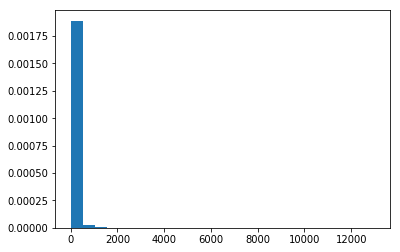

In [21]:
#Histogram of Price before trimming outliers. 
#The majority of values are below $500 but a handful go up to $12,000/night. 
plt.hist(abb_list['price'], density=True, bins=25)
plt.show()

## Inspecting Outliers - maximum_nights

In [22]:
abb_list[(abb_list['maximum_nights'] > abb_list['maximum_nights'].quantile(0.9))].sort_values(by='maximum_nights')

,id,listing_url,experiences_offered,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_verifications,neighbourhood,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,square_feet_notNA,monthly_price_notNA,weekly_price_notNA,security_deposit_notNA,cleaning_fee_notNA,host_response_rate_notNA,host_neighbourhood_notNA,neighbourhood_notNA,host_response_time_notNA,bathrooms_notNA,host_is_superhost_notNA,beds_notNA,bedrooms_notNA
7430,16309682,https://www.airbnb.com/rooms/16309682,none,within an hour,100.0,t,Oakridge,"['email', 'phone', 'reviews', 'jumio', 'govern...",Pelmo Park,Pelmo Park-Humberlea,43.707794,-79.527059,f,House,Entire home/apt,8,1.0,3.0,3.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,H...",399.0,500.0,139.0,1,8.0,4,1127,yesterday,t,6,36,66,341,f,super_strict_30,f,f,0.07,False,False,False,True,True,True,True,True,True,True,True,True,True
4742,12273993,https://www.airbnb.com/rooms/12273993,none,within an hour,98.0,f,Entertainment District,"['email', 'phone', 'reviews', 'jumio', 'offlin...",Downtown Toronto,Waterfront Communities-The Island,43.641489,-79.395714,f,Serviced apartment,Entire home/apt,10,4.0,3.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",1076.0,500.0,150.0,6,50.0,1,1137,today,t,29,58,88,363,f,strict_14_with_grace_period,f,f,3.50,False,False,False,True,True,True,True,True,True,True,True,True,True
8423,17992558,https://www.airbnb.com/rooms/17992558,none,within an hour,0.0,f,Unknown,"['phone', 'reviews']",Bayview Village,Bayview Village,43.775006,-79.388375,f,Apartment,Entire home/apt,4,1.0,0.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",75.0,0.0,0.0,2,10.0,2,1200,5 months ago,t,0,0,0,0,f,strict_14_with_grace_period,f,f,0.57,False,False,False,False,False,False,False,True,False,True,True,True,True
225,692262,https://www.airbnb.com/rooms/692262,none,within a few hours,100.0,f,Fairbank,"['email', 'phone', 'facebook', 'reviews']",Unknown,Corso Italia-Davenport,43.677661,-79.443432,t,House,Entire home/apt,3,2.0,3.0,3.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,""Fre...",200.0,300.0,100.0,1,100.0,30,1460,2 weeks ago,t,0,0,0,160,f,strict_14_with_grace_period,t,t,NaN,True,True,True,True,True,True,True,False,True,True,True,True,True
7339,16172347,https://www.airbnb.com/rooms/16172347,none,within an hour,100.0,t,Financial District,"['email', 'phone', 'facebook', 'reviews', 'jum...",Downtown Toronto,Church-Yonge Corridor,43.662680,-79.383403,t,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",105.0,550.0,69.0,1,50.0,1,1500,5 weeks ago,t,26,56,86,361,t,strict_14_with_grace_period,f,f,2.60,False,False,False,True,True,True,True,True,True,True,True,True,True
185,573892,https://www.airbnb.com/rooms/573892,none,within an hour,100.0,f,Entertainment District,"['email', 'phone', 'reviews', 'jumio', 'offlin...",Entertainment District,Waterfront Communities-The Island,43.643172,-79.380439,t,Condominium,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",""Wheelcha...",169.0,0.0,50.0,2,0.0,1,1825,2 weeks ago,t,5,17,42,317,f,strict_14_with_grace_period,f,f,0.87,False,True,False,True,True,True,True,True,True,True,True,True,True
11041,20953519,https://www.airbnb.com/rooms/20953519,none,within an hour,100.0,f,Entertainment District,"['email', 'phone', 'reviews', 'jumio', 'offlin...",Entertainment District,Waterfront Communities-The Island,43.642491,-79.380975,t,Condominium,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,Gym,E..."

Looking at the high values for maximum_nights, some of them seem nonsensical ('999999999', '2147483647', for example). I am not sure how this field is collected but I don't believe it would have much predictive power so I will remove it completely. 

In [23]:
abb_list.drop(columns='maximum_nights', axis=1, inplace=True)

## Handling Outliers Functionally

In [24]:
def handle_outliers(df, col, how=['drop', 'trim'], trim_what = ['both', 'upper', 'lower'], 
                    lower_bound=0.01, upper_bound=0.99):
    '''
    This function will handle trimming or removing outliers
    df = dataframe
    col = columns to handle
    trim_what = do you want to trim the upper bound, lower bound, or both?
    lower_bound, upper_bound = the quantiles to determine outliers
    '''
    for iter in col:
        lower = df[iter].quantile(lower_bound)
        upper = df[iter].quantile(upper_bound)
        if how == 'drop':
        #if how == 'drop', drop the records outside the lower and upper bounds
            df = df.drop(df[(df[iter] < lower) | (df[iter] > upper)].index)
        elif how == 'trim':
            if trim_what == 'both':
                df.replace(to_replace = df[df[iter] < lower], value = lower, inplace=True)
                df.replace(to_replace = df[df[iter] > upper], value = upper, inplace=True)
            elif trim_what == 'lower':
                df.replace(to_replace = df[df[iter] < lower], value = lower, inplace=True)
            elif trim_what == 'upper':
                df.replace(to_replace = df[df[iter] > upper], value = upper, inplace=True)

            
    return(df)

In [25]:
#Drop records with price, security deposit, cleaning fee outliers below 0.001 quantile and above 0.995 quantile
cols = ['price', 'security_deposit', 'cleaning_fee']
abb_list = handle_outliers(df=abb_list, col=cols, how='drop', lower_bound=0.001, upper_bound=0.995)
abb_list.describe()

,id,host_response_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_30,availability_60,availability_90,availability_365,reviews_per_month
count,1.726900e+04,17269.000000,17269.000000,17269.000000,17269.000000,17269.000000,17269.000000,17269.000000,17269.000000,17269.000000,17269.000000,17269.000000,17269.000000,17269.000000,17269.000000,17269.000000,17269.000000,17269.000000,14141.000000
mean,1.681514e+07,74.425329,43.678629,-79.397101,3.029475,1.219295,1.285714,1.636632,128.674446,218.264057,44.127975,1.618276,13.669466,6.022873,6.847183,18.048990,32.448955,123.646187,1.956740
std,7.575278e+06,41.082758,0.047146,0.060760,1.866242,0.500552,0.806516,1.026092,101.419022,280.209718,41.009359,1.208649,22.373301,25.553291,8.842016,19.432489,31.101320,127.905567,2.146805
min,1.419000e+03,0.000000,43.586713,-79.624535,1.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
50%,1.844903e+07,100.000000,43.661946,-79.397705,2.000000,1.000000,1.000000,1.000000,100.000000,150.000000,38.000000,1.000000,7.000000,2.000000,3.000000,10.000000,27.000000,73.000000,1.100000
99%,2.746033e+07,100.000000,43.808099,-79.211897,10.000000,3.000000,4.000000,5.000000,526.960000,1132.000000,170.960000,6.000000,100.000000,90.000000,30.000000,60.000000,90.000000,365.000000,9.350000
max,2.758201e+07,100.000000,43.847487,-79.127812,16.000000,8.000000,12.000000,16.000000,963.000000,2000.000000,225.000000,16.000000,392.000000,1125.000000,30.000000,60.000000,90.000000,365.000000,16.860000


In [26]:
#Trim accomodates, bathrooms, bedrooms, beds, guests_included, extra_people, minimum_nights to the 99th percentiles
cols = ['bathrooms']
#cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'extra_people', 'minimum_nights']
abb_list = handle_outliers(df=abb_list, col=cols, how='trim', trim_what = 'upper', upper_bound=0.95)
abb_list.describe()

KeyboardInterrupt: 

Now that nulls and outliers have been taken care of in the AirBnB dataset, it is time to turn my attention to the Yelp dataset, which thankfully has fewer variables in need of wrangling. 

# Yelp Dataset Analysis

Next we will open the Yelp dataset. This data comes from Yelp's Academic dataset, found here: https://www.yelp.com/dataset

The data is made available by Yelp in JSON format. 

(Insert more info here, and the Kaggle links with additional documentation). 

In [ ]:
#Read in Yelp Business dataset
path='D:/Coding Projects/Springboard/Capstone/Yelp/yelp_academic_dataset_business.json'
yelp_df = pd.read_json(path, lines=True)

In [ ]:
yelp_df.head()

In [ ]:
#View list of cities
print(list(yelp_df.city.unique()))

In [ ]:
#There are too many cities to view this way,
#...instead let's look for the top 10 cities in the dataset

city_count = yelp_df['city'].value_counts().to_frame().reset_index().sort_values('city', ascending=False)

city_count.head(10)

